In [39]:
# Required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Description about the dataset**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

In [21]:
# Read the dataset from the csv file
data = pd.read_csv("diabetes.csv")

# Display the head of the dataset
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [22]:
# Display the number of observations and attributes
num_observations, num_attributes = df.shape
print(f'Number of Observations: {num_observations}')
print(f'Number of Attributes: {num_attributes}')

Number of Observations: 768
Number of Attributes: 9


# **Description about the attributes of the dataset**


*  Pregnancies: To express the Number of pregnancies
*  Glucose: To express the Glucose level in blood
*  BloodPressure: To express the Blood pressure measurement
*  SkinThickness: To express the thickness of the skin
*  Insulin: To express the Insulin level in blood
*  BMI: To express the Body mass index
*  DiabetesPedigreeFunction: To express the Diabetes percentage
*  Age: To express the age
*  Outcome: To express the final result 1 is Yes and 0 is No

In [24]:
# Check for null values
null_values = data.isnull().sum()

# Display columns with null values and their counts
print("Columns with null values:")
print(null_values[null_values > 0])

Columns with null values:
Series([], dtype: int64)



This output indicates that there are no columns with null (missing) values in the dataset.

# **Exploratory Data Analysis**

## Histogram of the Glucose level

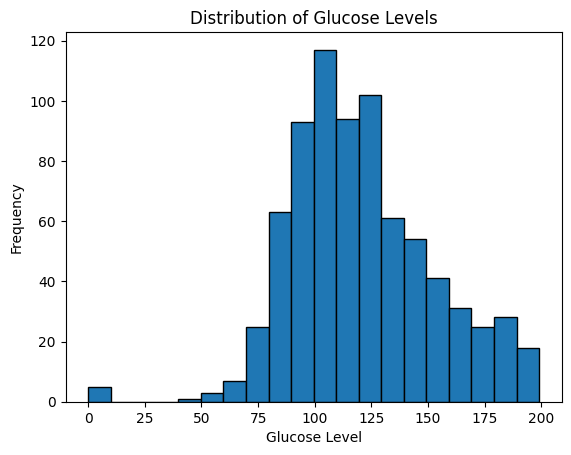

In [35]:
plt.hist(data['Glucose'], bins = 20, edgecolor = 'k')

plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose Levels')
plt.show()

##### This graph indicates that most of the glucose level values are lies between arount 80 to 160

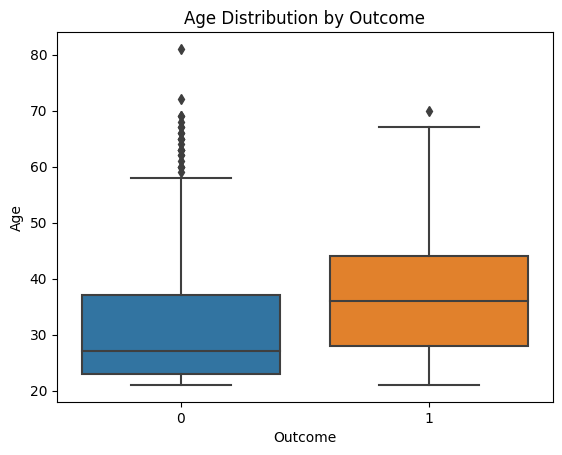

In [40]:
# Box plot of Age by Outcome
sns.boxplot(x='Outcome', y='Age', data=data)
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.title('Age Distribution by Outcome')
plt.show()

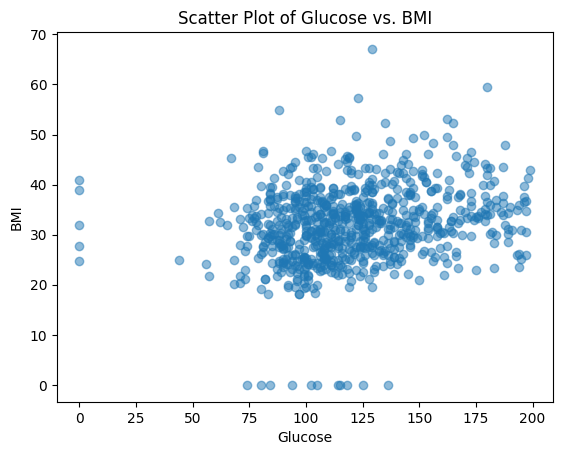

In [42]:
# Scatter plot of Glucose vs. BMI
plt.scatter(data['Glucose'], data['BMI'], alpha=0.5)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Scatter Plot of Glucose vs. BMI')
plt.show()


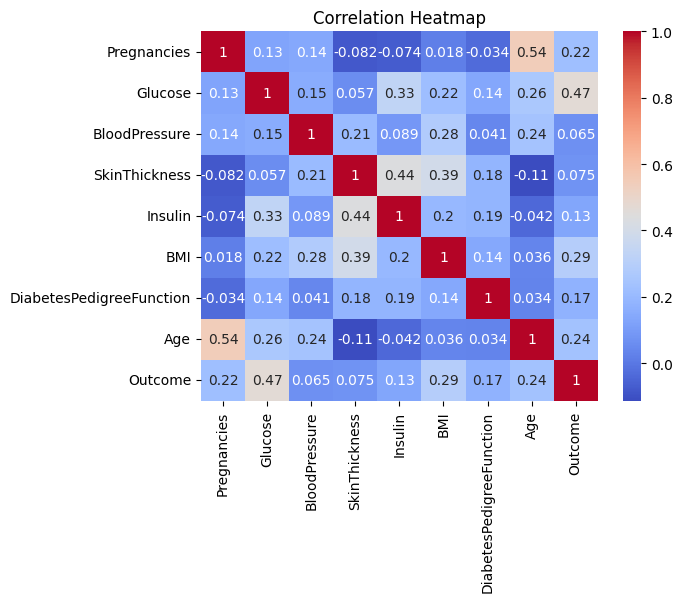

In [43]:
# Correlation Heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


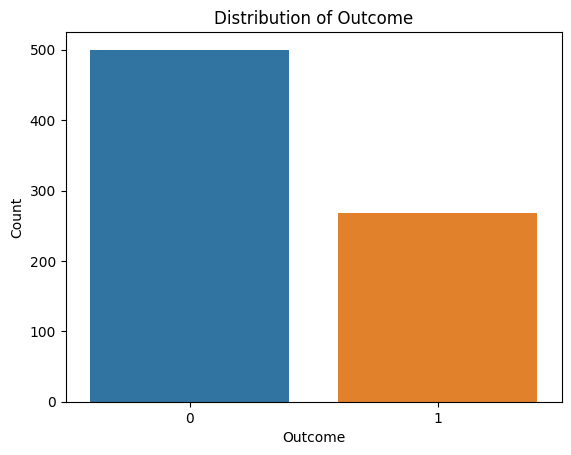

In [44]:
# Bar chart of Outcome counts
sns.countplot(x='Outcome', data=df)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome')
plt.show()


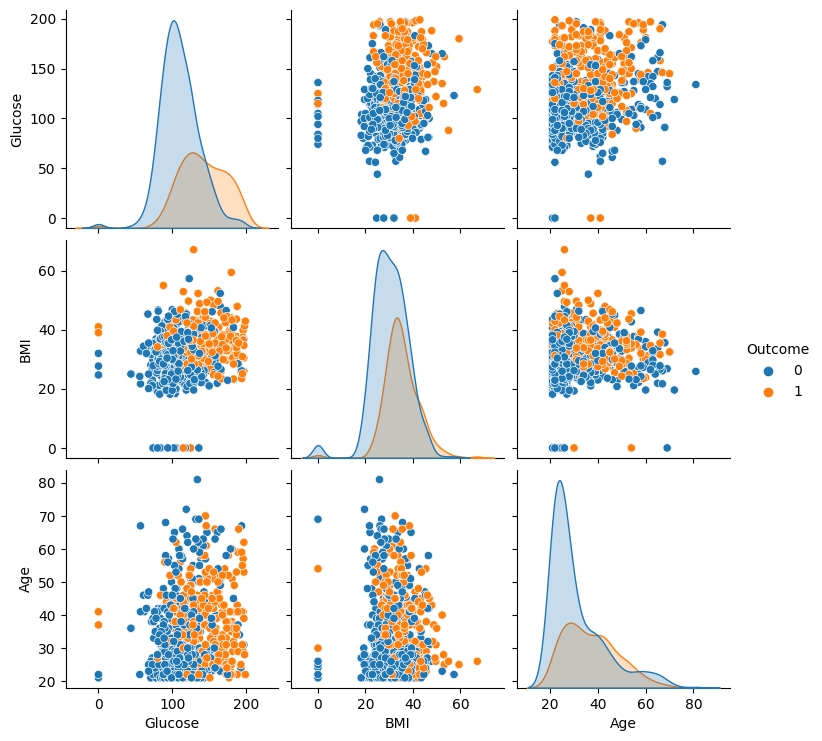

In [45]:
# Pair plot of a few selected features
sns.pairplot(data[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.show()


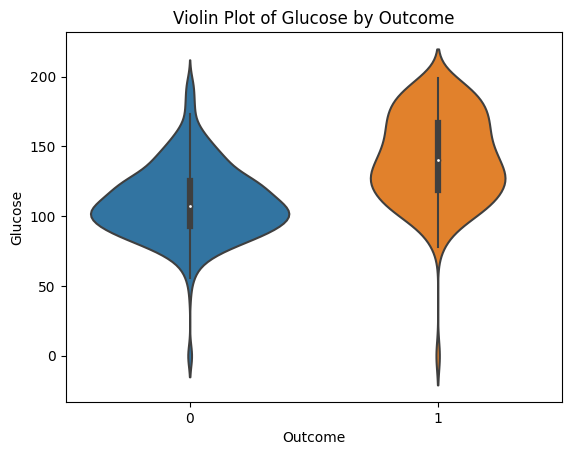

In [49]:
sns.violinplot(x='Outcome', y='Glucose', data = data)
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.title('Violin Plot of Glucose by Outcome')
plt.show()

# Develop the model

In [50]:
# Step 1: Data Preprocessing
# Assuming your dataset is in a pandas DataFrame called 'df'

# Handle missing values (Replace 0 values in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' with NaN)
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Impute missing values (Replace NaN values with the mean of the respective columns)
df.fillna(df.mean(), inplace=True)

# Step 2: Split the Data
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Select a Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Step 4: Train the Model
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.7597402597402597
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


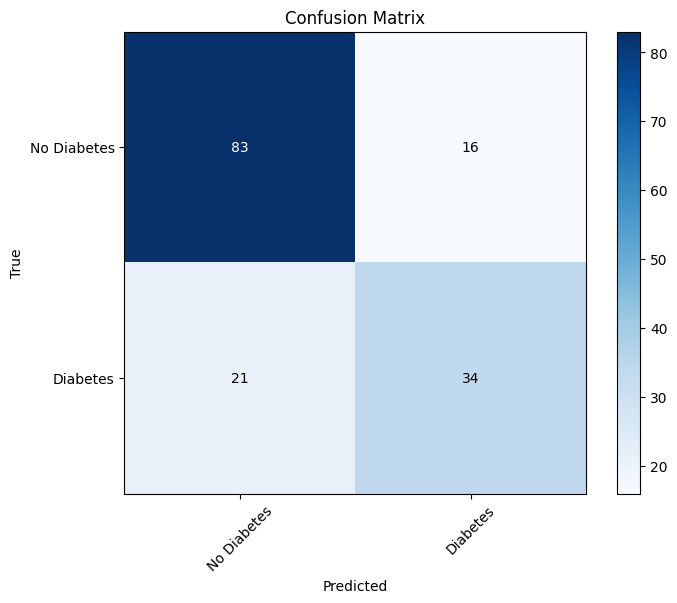

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'y_pred' contains the predicted labels and 'y_test' contains the true labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['No Diabetes', 'Diabetes']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

plt.show()
